In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline

In [6]:
df = pd.read_csv('data/train.csv')
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df['normal'] = (df[categories].sum(axis=1) == 0).astype(int)
df['comment_text'] = df['comment_text'].apply(lambda x: x.lower())
df = df.sample(frac=1)
categories.append('normal')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,normal
23936,247106025119,because it's standardized layout?,0,0,0,0,0,0,1
53058,553294871390,"well with all due respect, the rules here suck...",0,0,0,0,0,0,1
92095,961642730722,"""wikipedia has a reputation for being a joke o...",0,0,0,0,0,0,1
85504,892260244981,analytic continuation \n\nhere's a function eq...,0,0,0,0,0,0,1
28623,297098495234,"""\n\nsockpuppetry case\n \nyou have been accus...",0,0,0,0,0,0,1


In [3]:
print(df.shape)
df = df[df['normal'] == 0]
df.shape

(95851, 9)


(9790, 9)

In [10]:
def split_train_val(df, categories):
    train_sets, val_sets = [], []
    for cat in categories:
        cat_df = df[df[cat] == 1]
        train_size = int(cat_df.shape[0]*0.8)
        train_sets.append(cat_df.iloc[:train_size, :])
        val_sets.append(cat_df.iloc[train_size:, :])
    train_df = pd.concat(train_sets)
    val_df = pd.concat(val_sets)

train_df, val_df = split_train_val(df, categories)
print(train_df.shape, val_df.shape, df.shape)

(85803, 9) (21453, 9) (95851, 9)


In [3]:
def over_sample(df, categories):
    split_sets = []
    for cat in categories:
        cat_df = df[df[cat] == 1]
        cat_df[categories] = 0
        cat_df[cat] = 1
        
        label = categories.index(cat)
        cat_df['label'] = label
        
        split_sets.append(cat_df)
        
    split_df = pd.concat(split_sets)
    split_df = split_df.reset_index(drop=True)
    split_df['id'] = split_df.index
    print(np.unique(split_df['id'].values).shape,split_df['id'].shape)
    
    ros = RandomOverSampler()
    ids = split_df['id']
    sampled_ids, sampled_labels = ros.fit_sample(ids.values.reshape((-1, 1)), split_df['label'])
    sampled_ids = pd.DataFrame(sampled_ids.reshape([sampled_ids.shape[0]]), columns=['id'])
    sampled_df = sampled_ids.merge(split_df, on='id')
    return sampled_df, split_df

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

(115770,) (115770,)


[]

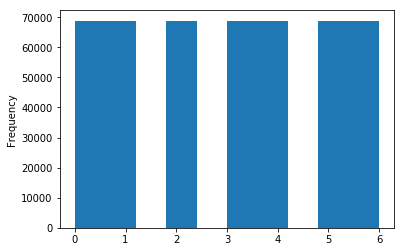

In [12]:
train_sampled_df, _ = over_sample(train_df, categories)
train_sampled_df['label'].plot.hist().plot()

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

(28970,) (28970,)


[]

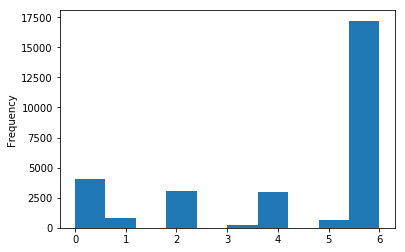

In [13]:
_, val_split_df = over_sample(val_df, categories)
val_split_df['label'].plot.hist().plot()

In [14]:
train_sampled_df.to_csv('data/train_over_sampled.csv')
val_split_df.to_csv('data/val_split.csv')

In [7]:
df, _ = over_sample(df, categories)
df.to_csv('data/train_over_sampled_all.csv')
df['label'].plot.hist().plot()

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

(107256,) (107256,)


[]

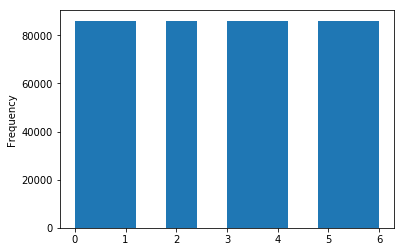

In [10]:
ssum = df[categories].sum(axis=1).astype(float).values
cats = df[categories].values
cats = np.reshape(cats, [cats.shape[0], cats.shape[-1]])
labels = pd.DataFrame(cats / ssum[:, None], columns=categories)
labels.iloc[32, :]

toxic            0.333333
severe_toxic     0.000000
obscene          0.333333
threat           0.000000
insult           0.333333
identity_hate    0.000000
normal           0.000000
Name: 32, dtype: float64

In [11]:
df[categories] = labels
df.head()
df.to_csv('data/train_normalized_label.csv')

In [13]:
sampled_df.shape

(602427, 10)